## **Experiment 10**

### **Name : Smayan Kulkarni, SAP ID : 60009230142 , Roll Number : D100, Division : D2-2**

In [32]:
import pandas as pd
import numpy as np

1. In the Titanic dataset, replace missing values in the age column with the median age of passengers.



In [33]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipykernel_20194/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [35]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2. In the Titanic dataset, detect outliers in the fare column using Z-scores and display them.



In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

todetectoutliers= scaler.fit_transform(df[['Fare']])
outliers = []

for val in todetectoutliers:
    if val > 3.0 or val < -3.0:
        outliers.append(val)

outliers
finaloutliers = scaler.inverse_transform(outliers)
finaloutliers

array([[263.    ],
       [263.    ],
       [247.5208],
       [512.3292],
       [247.5208],
       [262.375 ],
       [263.    ],
       [211.5   ],
       [227.525 ],
       [263.    ],
       [221.7792],
       [227.525 ],
       [512.3292],
       [211.3375],
       [227.525 ],
       [227.525 ],
       [211.3375],
       [512.3292],
       [262.375 ],
       [211.3375]])

3. Given the Iris dataset, identify and print rows where sepal length (cm) is an outlier using the IQR method.



In [37]:
df = pd.read_csv('Iris.csv')
df.head()
sepal_length = df['SepalLengthCm']

Q1 = sepal_length.quantile(0.25)
Q3 = sepal_length.quantile(0.75)

IQR  = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(sepal_length < lower_bound) | (sepal_length > upper_bound)]
outliers


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


4. Given the Iris dataset, calculate and print the Z-scores for petal width (cm) and identify outliers.


In [38]:
petal_width = df['PetalWidthCm']

mean = petal_width.mean()
std = petal_width.std()

normalized = []
for i in petal_width:
    norm = (i - mean )/ (std)
    normalized.append(norm)

normalized

outliers = []

for val in normalized:
    if val > 3.0 or val < -3.0:
        outliers.append(val)

outliers

[]


5. For the Boston Housing dataset, drop rows where the RM (average number of rooms per dwelling) column has missing values.


In [39]:
df=  pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [40]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

**No null values**


6. For the Boston Housing dataset, use the IQR method to detect outliers in the AGE column and list them.



In [41]:
ages = df['AGE']

Q1 = ages.quantile(0.25)
Q3 = ages.quantile(0.75)

IQR  = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(ages < lower_bound) | (ages > upper_bound)]
outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


7. In the Wine Quality dataset, fill missing values in the total sulfur dioxide column with the mean of that column.



In [42]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [43]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

8. In the Wine Quality dataset, replace missing values in the fixed acidity column with 0 and display the cleaned DataFrame.

In [44]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [47]:
for row, val in df.iterrows():
    print(f" {row} -> {val}")
    

 0 -> fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
quality                  5.0000
Id                       0.0000
Name: 0, dtype: float64
 1 -> fixed acidity            7.8000
volatile acidity         0.8800
citric acid              0.0000
residual sugar           2.6000
chlorides                0.0980
free sulfur dioxide     25.0000
total sulfur dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
quality                  5.0000
Id                       1.0000
Name: 1, dtype: float64
 2 -> fixed acidity            7.800
volatile acidity         0.760
citric acid              0.040
residual 

In [52]:
for col, val in df.iteritems():
    print(col)
    print(val)
    

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [53]:
df.loc[1:4]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [54]:
df.loc[1:4, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [55]:
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3


In [58]:
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [59]:
df2 = pd.read_csv('titanic.csv')

In [67]:
df3 = pd.concat([df, df2], ignore_index=True, axis= 0)

In [68]:
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.00,NaN,S
2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.00,B42,S
2031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.45,NaN,S
2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.00,C148,C


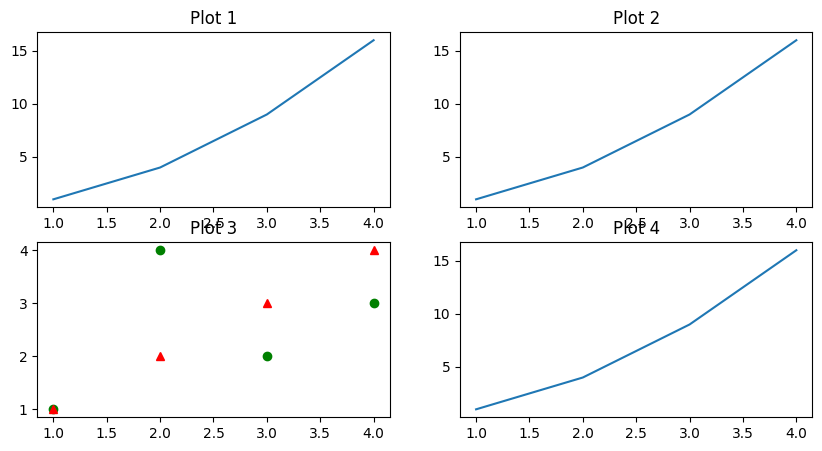

In [114]:
import matplotlib.pyplot as plt
list1 = [1,2,3,4]
list2 = list(map(lambda  x : x**2, list1))
fig, ax = plt.subplots(2,2,figsize = (10,5))             # Create a figure containing a single Axes.
ax[1,0].plot([1, 2, 3, 4], [1, 4, 2, 3], 'go', np.arange(1,5) , np.arange(1,5), 'r^')  # Plot some data on the Axes.
ax[0,1].plot(list1, list2 )
ax[1,1].plot(list1, list2 )
ax[0,0].plot(list1, list2 )
ax[1,0].set_title("Plot 3")
ax[0,0].set_title("Plot 1")
ax[1,1].set_title("Plot 4")
ax[0,1].set_title("Plot 2")
plt.show()        

Text(0, 0.5, 'Marks')

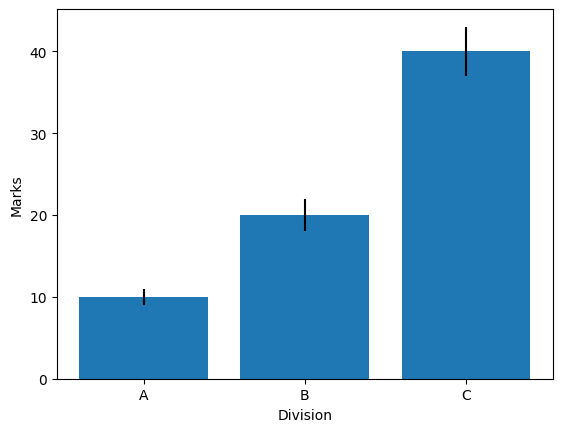

In [120]:
divisions = ['A', 'B', 'C']
marks = [ 10, 20,40]
var = [1,2,3]
plt.bar(divisions, marks, yerr= var)
plt.xlabel("Division")
plt.ylabel("Marks")

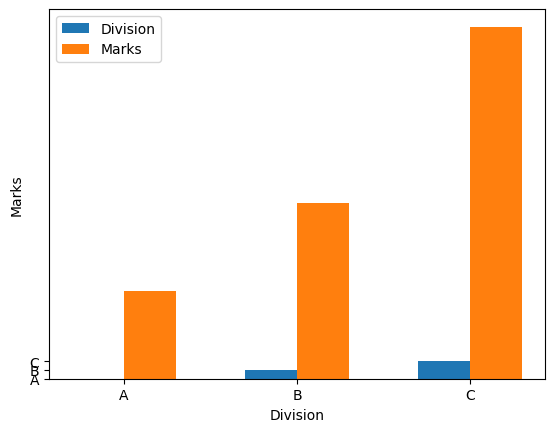

In [127]:
index = np.arange(3)
width = 0.3

plt.bar(index, divisions, width, label = "Division")
plt.bar(index+width, marks, width, label = "Marks")

plt.xticks(index + width / 2, divisions)
plt.xlabel('Division')
plt.ylabel('Marks')

plt.legend(loc = 'best')
plt.show()

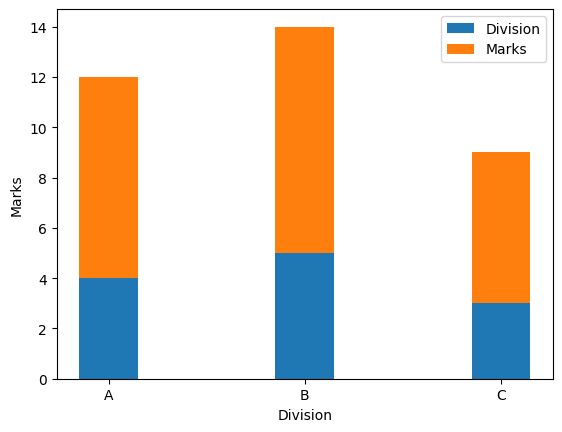

In [129]:
index = np.arange(3)
width = 0.3
boy_marks = [4,5,3]
girl_marks = [8,9,6]
plt.bar(index, boy_marks, width, label = "Division")
plt.bar(index, girl_marks, width, label = "Marks", bottom=boy_marks)

plt.xticks(index, divisions)
plt.xlabel('Division')
plt.ylabel('Marks')

plt.legend(loc = 'best')
plt.show()

In [134]:
dict1 = {'a' : 1, 'b' : 3, 'c' :3}
dict2 = {'f' : 1, 'b' : 3, 'g' : 3}


ans = {} 

for key, value in dict1.items():
    if key in ans:
        ans[key].append(value)
    else:
        ans[key] = [value]


for key, value in dict2.items():
    if key in ans:
        ans[key].append(value)
    else:
        ans[key] = [value]
ans

{'a': [1], 'b': [3, 3], 'c': [3], 'f': [1], 'g': [3]}

In [141]:
from mpl_toolkits import mplot3d

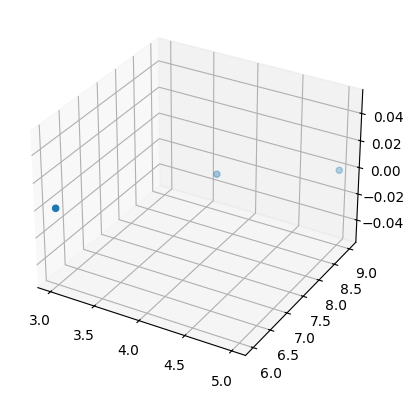

In [142]:
ax = plt.axes(projection = '3d')
ax.scatter3D(boy_marks, girl_marks)
plt.show()

In [144]:
data = { 

    'total_bill': [16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 19.08, 16.82, 20.23], 

 

    'tip': [1.01, 1.66, 3.50, 3.31, 3.61, 4.71, 2.00, 3.12, 2.48, 3.00,1.71, 5.00, 2.42, 3.00, 2.88, 3.27, 1.66, 3.00, 3.02, 3.19], 

    'sex': ['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female','Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male'], 

    'smoker': ['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No','No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No'], 

    'day': ['Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun'], 

    'time': ['Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner','Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner'], 

    'size': [2, 3, 3, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4] 

} 

In [145]:
tips_df = pd.DataFrame(data) 

In [147]:
import seaborn as sns

<Axes: xlabel='total_bill', ylabel='tip'>

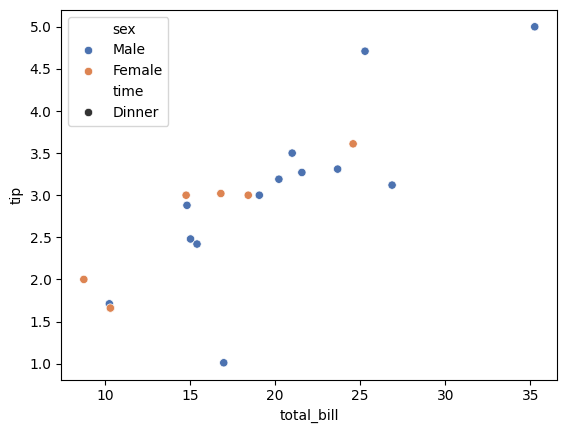

In [155]:
sns.scatterplot(data = tips_df, x = "total_bill", y = "tip", hue = 'sex', style='time', palette='deep')

<Axes: xlabel='size', ylabel='total_bill'>

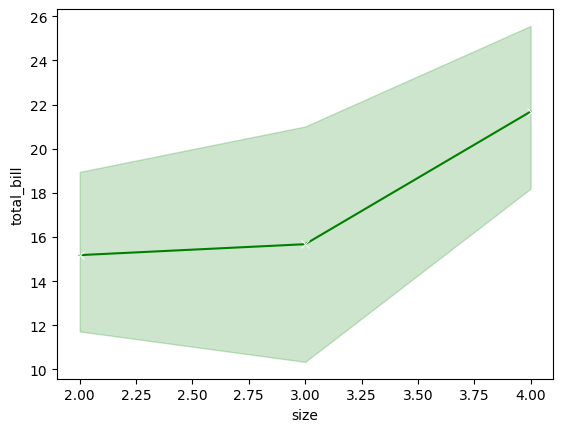

In [161]:
sns.lineplot(data=tips_df, x="size", y="total_bill", marker="x", color="green") 

/tmp/ipykernel_20194/2600383966.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips_df, x="day", y="total_bill", errorbar="sd", palette="Blues")


<Axes: xlabel='day', ylabel='total_bill'>

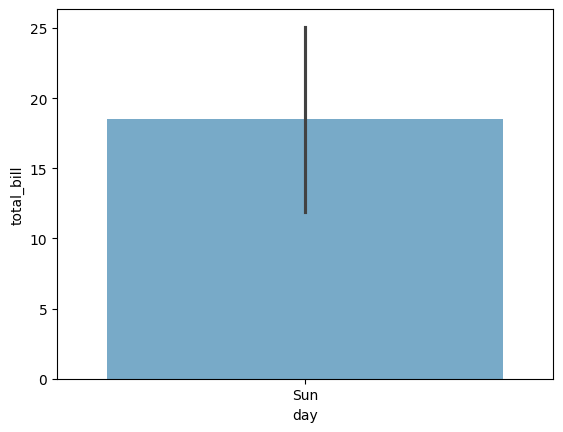

In [164]:


sns.barplot(data=tips_df, x="day", y="total_bill", errorbar="sd", palette="Blues") 

<Axes: xlabel='total_bill', ylabel='Count'>

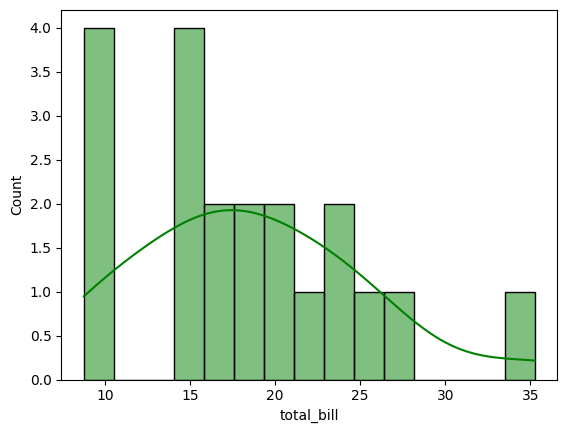

In [166]:
sns.histplot(tips_df["total_bill"], kde=True, bins=15, color="green") 

/tmp/ipykernel_20194/644971370.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tips_df, x="sex", y="total_bill", palette="Set2")


<Axes: xlabel='sex', ylabel='total_bill'>

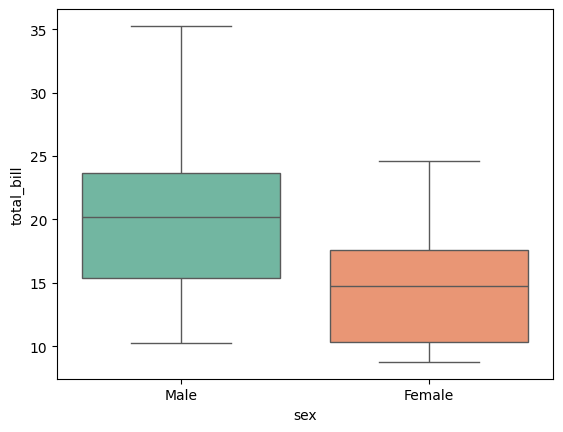

In [171]:
sns.boxplot(data=tips_df, x="sex", y="total_bill", palette="Set2") 

<Axes: >

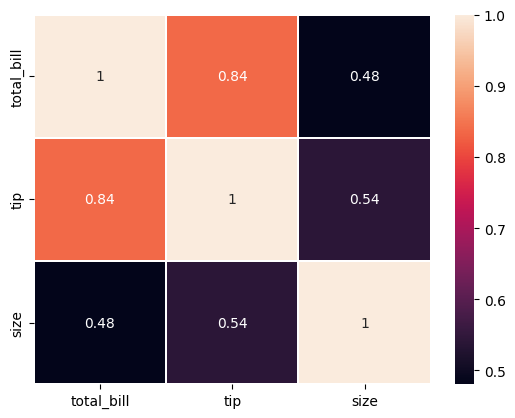

In [175]:
corr = tips_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, linewidths=0.3)

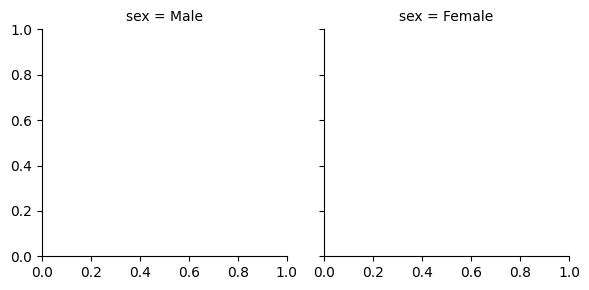

In [187]:
g = sns.FacetGrid(tips_df, col = 'sex')

In [188]:
g.map_dataframe(sns.scatterplot, x ='total_bill', y = 'tip')
plt.show()